In [82]:
import geopandas as gp
import pandas as pd
import plotly.express as px
from shapely.ops import unary_union
import shapely

In [189]:
municipalities = gp.read_file('data/geo_df.shp')

In [191]:
mappedMuniDist = pd.read_csv('map_muni_dist.csv')

In [192]:
temp = pd.merge(municipalities, mappedMuniDist, on = "istat_code", how = "left")

<AxesSubplot:>

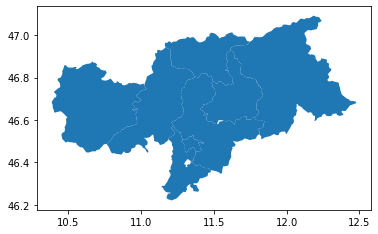

In [193]:
districts = temp.dissolve(by='district', aggfunc='sum')
districts.plot()

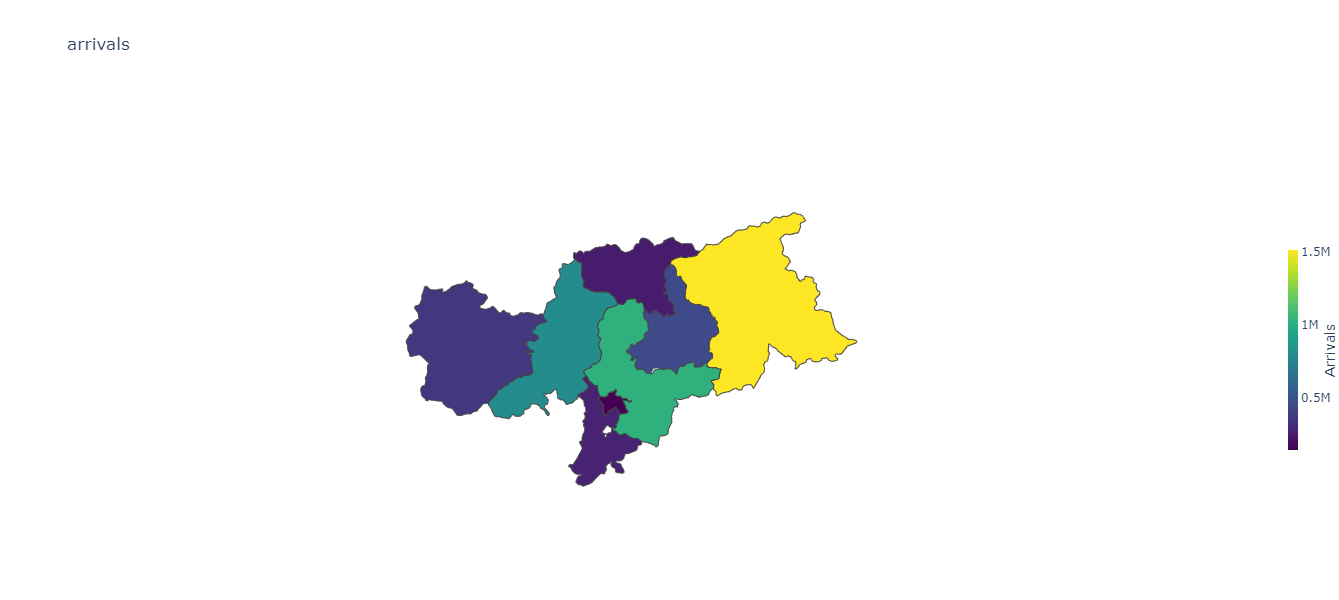

In [194]:
fig = px.choropleth(districts,
                        geojson=districts.geometry,
                        locations=districts.index,
                        color='arrivi_tot',
                        projection='mercator',
                        color_continuous_scale='viridis',
                        # range_color=[vmin, vmax],
                        title='arrivals',
                        labels={'arrivi_tot': 'Arrivals'},
                        height=600,
                        hover_data=['arrivi_tot']
                        )

fig.update_geos(fitbounds="locations", visible=False,)

fig.update_layout(
        margin={"r": 0, "t": 100, "l": 0, "b": 0},
        coloraxis_colorbar_thickness=10,
        coloraxis_colorbar_title_side='right',
        # coloraxis_colorbar_x=0.83
        # disable drag and zoom
        dragmode=False,
        hoverlabel=dict(
            bgcolor="white",
            font_size=14
        )
    )

fig.update_coloraxes(colorbar_ypad=150, colorbar_xpad=0)
 
fig.show()